In [1]:
import torch
import torch.nn as nn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv('/Users/516-29/Pytorch/dip/딥러닝_파이토치_교과서_예제파일_(2)/chap02/data/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

In [6]:
trainset = torchvision.datasets.FashionMNIST(
    root = '/Users/516-29/Pytorch/dip/딥러닝_파이토치_교과서_예제파일_(2)/chap08/data', train=True,
    download = True,
    transform = transforms.ToTensor()
)

90.2%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

99.1%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



100.6%


Extracting /Users/516-29/Pytorch/dip/딥러닝_파이토치_교과서_예제파일_(2)/chap08/data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to /Users/516-29/Pytorch/dip/딥러닝_파이토치_교과서_예제파일_(2)/chap08/data\FashionMNIST\raw



69.5%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

119.3%

Extracting /Users/516-29/Pytorch/dip/딥러닝_파이토치_교과서_예제파일_(2)/chap08/data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /Users/516-29/Pytorch/dip/딥러닝_파이토치_교과서_예제파일_(2)/chap08/data\FashionMNIST\raw




C:\Users\516-29\anaconda3\envs\torch_book\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset,batch_size = batch_size,shuffle = True)

In [9]:
dataiter = iter(trainloader)
images,labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
7


In [10]:
def imshow(img,title):
    plt.figure(figsize= (batch_size * 4,4))
    plt.axis('off')
    plt.imshow(np.transpose(img,(1,2,0)))
    plt.title(title)
    plt.show()

In [11]:
def show_batch_images(dataloader):
    images,labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img,title=[str(x.item()) for x in labels])
    return images,labels

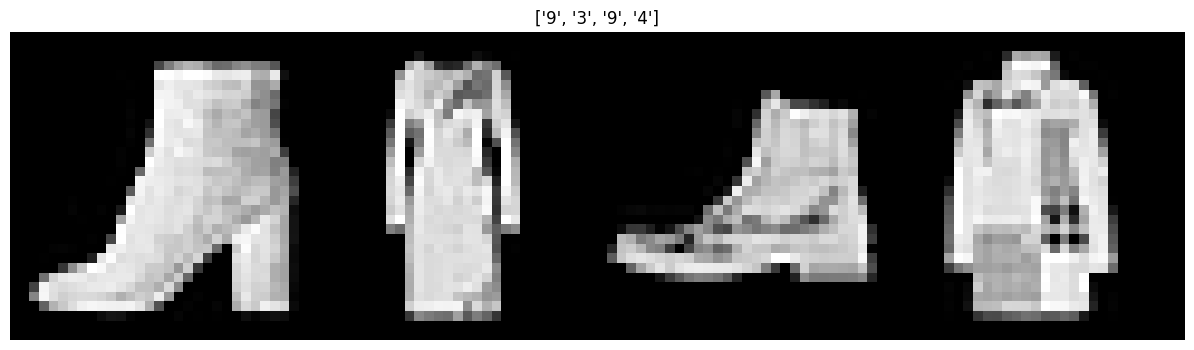

In [12]:
images,labels = show_batch_images(trainloader)

In [16]:
class Normalket(nn.Module):
    def __init__(self):
        super(Normalket,self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784,24),
            nn.ReLU(),
            nn.Linear(24,12),
            nn.ReLU(),
            nn.Linear(12,10)
        )

        def forward(self,x):
            x = x.view(x.size(0),-1)
            x = self.classifier(x)
            return x

In [17]:
class BNNet(nn.Module):
    def __init__(self):
        super(BNNet,self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784,24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24,12),
            nn.ReLU(),
            nn.Linear(12,10)
        )
        def forward(self,x):
            x = x.view(x.size(0),-1)
            x = self.classifier(x)
            return x

In [18]:
model = Normalket()
print(model)

Normalket(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=10, bias=True)
  )
)


In [19]:
model_bn = BNNet()
print(model_bn)

BNNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=24, bias=True)
    (1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=24, out_features=12, bias=True)
    (4): ReLU()
    (5): Linear(in_features=12, out_features=10, bias=True)
  )
)


In [27]:
batch_size = 512
trainloader = torch.utils.data.DataLoader(trainset,batch_size = batch_size,shuffle = True)

In [28]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr = 0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr = 0.01)

In [46]:
loss_arr = []
loss_bn_arr = []
max_epochs = 2

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader,0):
        inputs,labels = data
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()

        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn,labels)
        loss_bn.backward()
        opt_bn.step()

        loss_arr.append(loss.item())
        loss_bn_arr.append(loss.item())

        
    plt.plot(loss_arr, 'yellow', label = 'Normal')
    plt.plot(loss_bn_arr, 'blue', label = 'BatchNorm')
    plt.legend()
    plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (14336x28 and 1x50)

In [47]:
N=30
noise = 0.3

X_train = torch.unsqueeze(torch.linspace(-1,1,N),1)
y_train = X_train + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1))

X_test = torch.unsqueeze(torch.linspace(-1,1,N),1)
y_test = X_test + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1))


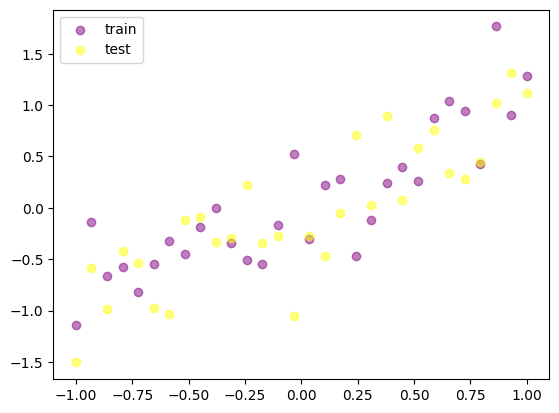

In [48]:
plt.scatter(X_train.data.numpy(), y_train.data.numpy(), c='purple', alpha = 0.5, label = 'train')
plt.scatter(X_test.data.numpy(), y_test.data.numpy(), c='yellow', alpha = 0.5, label = 'test')
plt.legend()
plt.show()

In [49]:
N_h = 50
model = torch.nn.Sequential(
    torch.nn.Linear(1,N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,1),
)
model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1,N_h),
    torch.nn.Dropout(0.1),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,N_h),
    torch.nn.Dropout(0.1),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,1),
)

In [50]:
opt = torch.optim.Adam(model.parameters(), lr = 0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr = 0.01)
loss_fn = torch.nn.MSELoss()

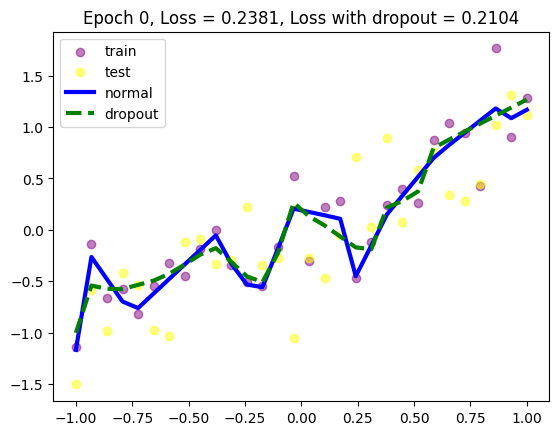

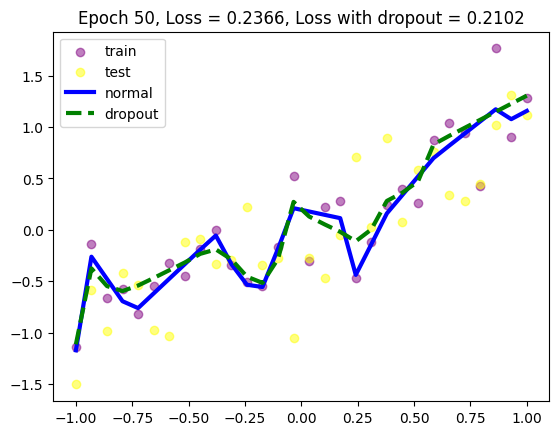

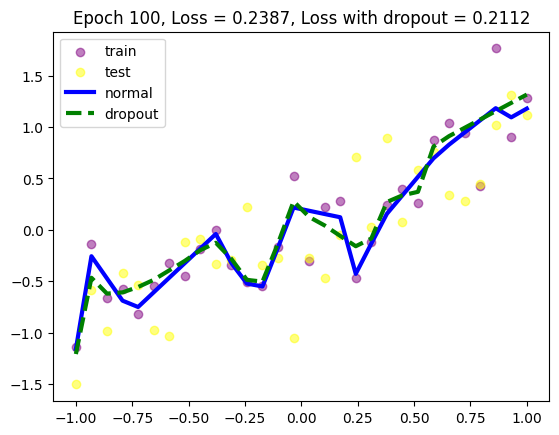

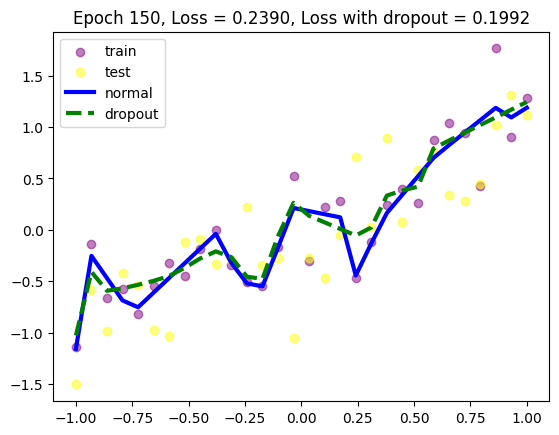

In [57]:
max_epochs = 200
for epoch in range(max_epochs):
    pred = model(X_train)
    loss = loss_fn(pred,y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()

    pred_dropout = model_dropout(X_train)
    loss_dropout = loss_fn(pred_dropout, y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()

    if epoch % 50 == 0:
        model.eval()
        model_dropout.eval()

        test_pred = model(X_test)
        test_loss = loss_fn(test_pred,y_test)
        test_pred_dropout = model_dropout(X_test)
        test_loss_dropout = loss_fn(test_pred_dropout,y_test)

        plt.scatter(X_train.data.numpy(),y_train.data.numpy(), c='purple', alpha = 0.5, label = 'train')
        plt.scatter(X_test.data.numpy(),y_test.data.numpy(), c='yellow', alpha = 0.5, label = 'test')
        plt.plot(X_test.data.numpy(),test_pred.data.numpy(), 'b-', lw = 3, label='normal')
        plt.plot(X_test.data.numpy(),test_pred_dropout.data.numpy(), 'g--', lw = 3, label='dropout')
        plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch,test_loss,test_loss_dropout))
        plt.legend()
        model.train()
        model_dropout.train()
        plt.pause(0.05)